## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.560610 -1.441722  1.376733 -0.865223 -0.521089 -1.185541
1  0.770309  0.475679  1.268784  0.718150 -1.454541  1.223462
2 -1.428834 -0.169747  0.353717 -1.521507 -0.280333 -2.127303
3  1.000976  0.433261  0.929786  0.402381  0.952143  1.501673
4  1.344953 -0.801220 -0.608940 -1.497385  1.632054 -0.359094


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9685291	total: 57.5ms	remaining: 57.5s
1:	learn: 0.9609978	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9509355	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9415872	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9344992	total: 60ms	remaining: 11.9s
5:	learn: 0.9248633	total: 60.6ms	remaining: 10s
6:	learn: 0.9149770	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9086687	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9019964	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8934149	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8872990	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8788258	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8697096	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8622552	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8564316	total: 65.4ms	remaining: 4.29s
15:	learn: 0.8494831	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8418071	total: 66.5ms	remaining: 3.85s
17:	learn: 0.8334791	total: 66.9ms	remaining: 3.65s
18:	learn: 0.8261881	total: 67.3ms	remaining: 3.4

107:	learn: 0.4052466	total: 106ms	remaining: 879ms
108:	learn: 0.4024964	total: 107ms	remaining: 875ms
109:	learn: 0.3991570	total: 107ms	remaining: 869ms
110:	learn: 0.3958647	total: 108ms	remaining: 864ms
111:	learn: 0.3929410	total: 108ms	remaining: 859ms
112:	learn: 0.3903215	total: 109ms	remaining: 854ms
113:	learn: 0.3876847	total: 109ms	remaining: 850ms
114:	learn: 0.3845564	total: 110ms	remaining: 844ms
115:	learn: 0.3816004	total: 110ms	remaining: 839ms
116:	learn: 0.3785789	total: 111ms	remaining: 836ms
117:	learn: 0.3756837	total: 111ms	remaining: 831ms
118:	learn: 0.3733327	total: 112ms	remaining: 828ms
119:	learn: 0.3707821	total: 112ms	remaining: 824ms
120:	learn: 0.3685971	total: 113ms	remaining: 820ms
121:	learn: 0.3653863	total: 113ms	remaining: 817ms
122:	learn: 0.3631017	total: 114ms	remaining: 813ms
123:	learn: 0.3603159	total: 114ms	remaining: 809ms
124:	learn: 0.3576017	total: 115ms	remaining: 805ms
125:	learn: 0.3554641	total: 116ms	remaining: 801ms
126:	learn: 

273:	learn: 0.1227390	total: 187ms	remaining: 495ms
274:	learn: 0.1217832	total: 187ms	remaining: 494ms
275:	learn: 0.1207803	total: 188ms	remaining: 492ms
276:	learn: 0.1199482	total: 188ms	remaining: 492ms
277:	learn: 0.1191972	total: 189ms	remaining: 490ms
278:	learn: 0.1181929	total: 189ms	remaining: 489ms
279:	learn: 0.1173359	total: 190ms	remaining: 488ms
280:	learn: 0.1164713	total: 190ms	remaining: 487ms
281:	learn: 0.1157220	total: 191ms	remaining: 486ms
282:	learn: 0.1148443	total: 191ms	remaining: 485ms
283:	learn: 0.1139268	total: 192ms	remaining: 483ms
284:	learn: 0.1130536	total: 192ms	remaining: 482ms
285:	learn: 0.1122242	total: 193ms	remaining: 481ms
286:	learn: 0.1114405	total: 193ms	remaining: 480ms
287:	learn: 0.1105256	total: 194ms	remaining: 478ms
288:	learn: 0.1096992	total: 194ms	remaining: 477ms
289:	learn: 0.1088444	total: 194ms	remaining: 476ms
290:	learn: 0.1080514	total: 195ms	remaining: 474ms
291:	learn: 0.1071580	total: 195ms	remaining: 473ms
292:	learn: 

488:	learn: 0.0363084	total: 290ms	remaining: 303ms
489:	learn: 0.0361600	total: 291ms	remaining: 303ms
490:	learn: 0.0360197	total: 291ms	remaining: 302ms
491:	learn: 0.0358592	total: 292ms	remaining: 301ms
492:	learn: 0.0357144	total: 292ms	remaining: 301ms
493:	learn: 0.0355238	total: 293ms	remaining: 300ms
494:	learn: 0.0353691	total: 293ms	remaining: 299ms
495:	learn: 0.0352330	total: 294ms	remaining: 299ms
496:	learn: 0.0350815	total: 294ms	remaining: 298ms
497:	learn: 0.0348978	total: 295ms	remaining: 297ms
498:	learn: 0.0347490	total: 295ms	remaining: 296ms
499:	learn: 0.0345345	total: 296ms	remaining: 296ms
500:	learn: 0.0344037	total: 296ms	remaining: 295ms
501:	learn: 0.0342843	total: 297ms	remaining: 294ms
502:	learn: 0.0341565	total: 297ms	remaining: 294ms
503:	learn: 0.0340010	total: 298ms	remaining: 293ms
504:	learn: 0.0338572	total: 298ms	remaining: 292ms
505:	learn: 0.0337329	total: 298ms	remaining: 291ms
506:	learn: 0.0335924	total: 299ms	remaining: 291ms
507:	learn: 

658:	learn: 0.0195199	total: 371ms	remaining: 192ms
659:	learn: 0.0194617	total: 371ms	remaining: 191ms
660:	learn: 0.0193437	total: 372ms	remaining: 191ms
661:	learn: 0.0192923	total: 372ms	remaining: 190ms
662:	learn: 0.0191799	total: 373ms	remaining: 189ms
663:	learn: 0.0191395	total: 373ms	remaining: 189ms
664:	learn: 0.0190263	total: 374ms	remaining: 188ms
665:	learn: 0.0189335	total: 374ms	remaining: 188ms
666:	learn: 0.0188874	total: 375ms	remaining: 187ms
667:	learn: 0.0188443	total: 375ms	remaining: 187ms
668:	learn: 0.0188020	total: 376ms	remaining: 186ms
669:	learn: 0.0187285	total: 376ms	remaining: 185ms
670:	learn: 0.0186869	total: 377ms	remaining: 185ms
671:	learn: 0.0185969	total: 377ms	remaining: 184ms
672:	learn: 0.0185560	total: 377ms	remaining: 183ms
673:	learn: 0.0184806	total: 378ms	remaining: 183ms
674:	learn: 0.0184039	total: 378ms	remaining: 182ms
675:	learn: 0.0183686	total: 379ms	remaining: 182ms
676:	learn: 0.0182938	total: 379ms	remaining: 181ms
677:	learn: 

873:	learn: 0.0097928	total: 473ms	remaining: 68.2ms
874:	learn: 0.0097350	total: 474ms	remaining: 67.7ms
875:	learn: 0.0097205	total: 474ms	remaining: 67.1ms
876:	learn: 0.0097118	total: 475ms	remaining: 66.6ms
877:	learn: 0.0096975	total: 475ms	remaining: 66ms
878:	learn: 0.0096890	total: 476ms	remaining: 65.5ms
879:	learn: 0.0096324	total: 476ms	remaining: 64.9ms
880:	learn: 0.0096226	total: 477ms	remaining: 64.4ms
881:	learn: 0.0096085	total: 477ms	remaining: 63.8ms
882:	learn: 0.0095946	total: 478ms	remaining: 63.3ms
883:	learn: 0.0095854	total: 478ms	remaining: 62.7ms
884:	learn: 0.0095349	total: 479ms	remaining: 62.2ms
885:	learn: 0.0095267	total: 479ms	remaining: 61.6ms
886:	learn: 0.0095130	total: 479ms	remaining: 61.1ms
887:	learn: 0.0094583	total: 480ms	remaining: 60.5ms
888:	learn: 0.0094503	total: 480ms	remaining: 60ms
889:	learn: 0.0094368	total: 481ms	remaining: 59.4ms
890:	learn: 0.0094289	total: 481ms	remaining: 58.9ms
891:	learn: 0.0093801	total: 482ms	remaining: 58.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

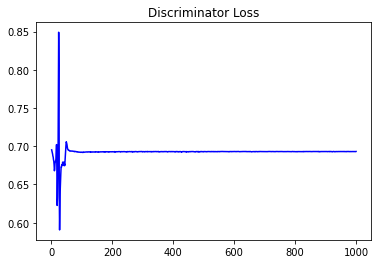

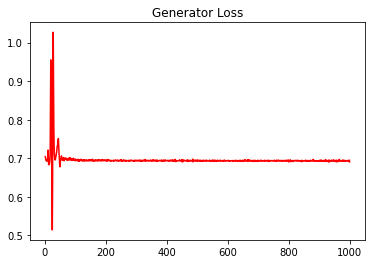

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12804977201603623


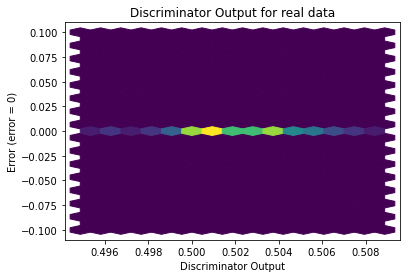

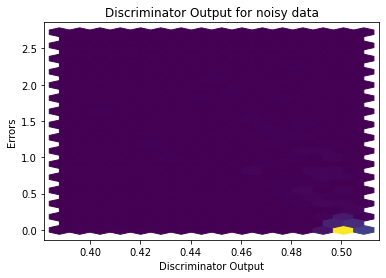

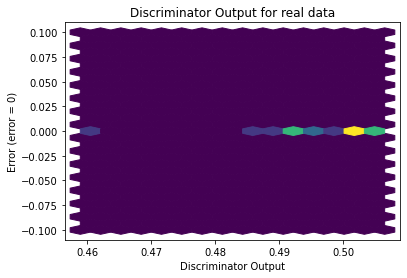

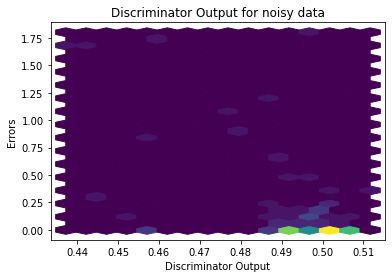

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


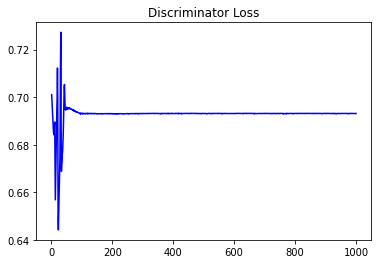

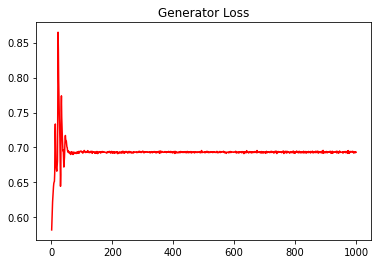

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15000608730691112


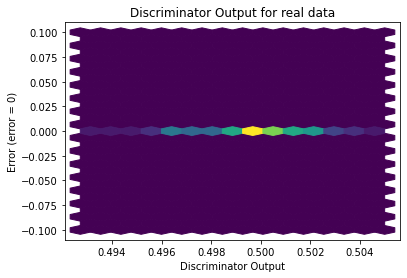

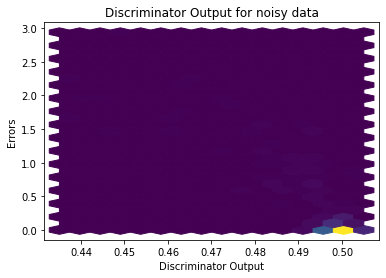

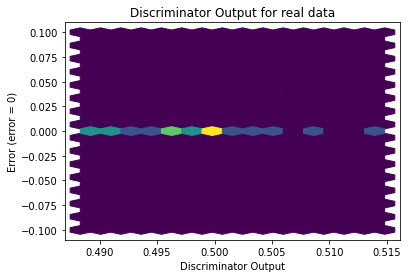

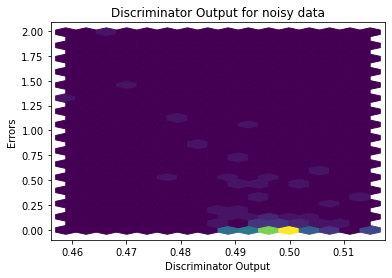

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8108]], requires_grad=True)
